In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
print(df.shape)
df.head()

(253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
# Splitting the dataset into features and target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [4]:
# Train/test split
train, test = train_test_split(df, test_size=0.5, random_state=21)
X_train, y_train = train.drop(columns = ['Diabetes_binary']), train['Diabetes_binary']
X_test, y_test = test.drop(columns = ['Diabetes_binary']), test['Diabetes_binary']
assert X_train.shape[0] == len(y_train)

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Fit random fores4
model = RandomForestClassifier(n_estimators = 10000,random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [7]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))         
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.861


In [8]:
# Define the model with adjusted parameters
from sklearn.model_selection import cross_val_score
# Increasing the number of estimators and setting a max depth
adjusted = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Performing 5-fold cross-validation
cv_scores = cross_val_score(adjusted, X_train_scaled, y_train, cv=5)

cv_scores.mean(), cv_scores.std()

(0.8654288867865028, 0.0002746964899114462)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

pred_scores = model.predict_proba(X = X_test)[:, 1] # predicted probability of diabetes
pred_labels = model.predict(X = X_test) # predicted label of diabetes

acc_score = accuracy_score(y_true = y_test, y_pred = pred_labels)
pre_score = precision_score(y_true = y_test, y_pred = pred_labels)
rec_score = recall_score(y_true = y_test, y_pred = pred_labels)
report = classification_report(y_true = y_test, y_pred = pred_labels)
f1 = f1_score(y_true = y_test, y_pred = pred_labels)

print(f"accuracy: {acc_score}")
print(f"precision: {pre_score}")
print(f"recall: {rec_score}")
print(f"f1: {f1}")
print(f"report: {report}")


accuracy: 0.8612898139388205
precision: 0.5087688219663419
recall: 0.16232408297066636
f1: 0.24612220413060246
report:               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92    109147
         1.0       0.51      0.16      0.25     17693

    accuracy                           0.86    126840
   macro avg       0.69      0.57      0.58    126840
weighted avg       0.83      0.86      0.83    126840



## Report and Analysis
According to the report we can see that non-diabetic patients have a higher precision rate (88%) and a higher recall rate (97%). Diabetes has lower precision (48%) and lower recall (17%). Overall, the model's predictive performance for non-diabetics is better than diabetes.

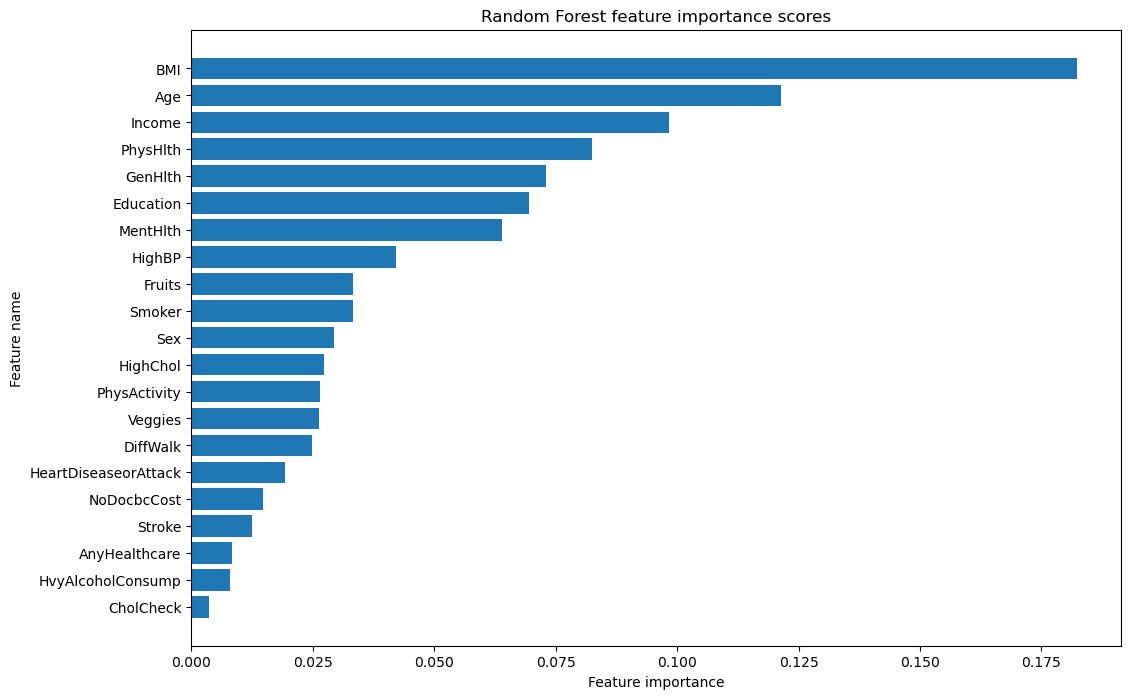

In [10]:
# Random Forest feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Create a DataFrame to hold feature names and their importance scores
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Random Forest feature importance scores')
plt.show()

In [11]:
# Rounding the importance scores to four decimal places
importances_rounded = importances.copy()
importances_rounded['Importance'] = importances_rounded['Importance'].round(4)
importances_rounded

,Feature,Importance
BMI,BMI,0.1823
Age,Age,0.1213
Income,Income,0.0983
PhysHlth,PhysHlth,0.0825
GenHlth,GenHlth,0.0730
Education,Education,0.0695
MentHlth,MentHlth,0.0639
HighBP,HighBP,0.0421
Fruits,Fruits,0.0333
Smoker,Smoker,0.0333


## Report and Analysis
Through the above plotting, we can see that the feature importance scores show the most important features for predicting diabetes in the random forest model. Based on importance scores, the five most important features are:
BMI, Age, Income, PhysHlth, Education